In [2]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\Riddhi\\Downloads\\preprocessed_data.csv') #path of csv file and create dataframe
df.head() #print dataframe

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bmi,bp
0,51,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0,21.967120,0.0
1,56,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0,34.927679,2.0
2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0,23.507805,2.0
3,49,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0,28.710479,2.0
4,49,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,23.011177,0.0


In [4]:
df2 = df.copy() #copy dataframe

#function for age classification
def age_function(age):
    if age <= 45:
        return 'younger'
    elif age > 45 and age <65:
        return 'middled'
    else:
        return 'elder'
    
df2['age'] = df2['age'].apply(age_function) #call the age function

In [5]:
#function for cholesterol_1 classification
def chol(cholesterol_1):
    if cholesterol_1 <= 0:
        return 'Do not have cholestrol'
    else:
        return ' have cholestrol'
    
df2['cholesterol_1'] = df2['cholesterol_1'].apply(chol) #call the age function

Text(0.5, 1.0, 'Age VS cholesterol_1')

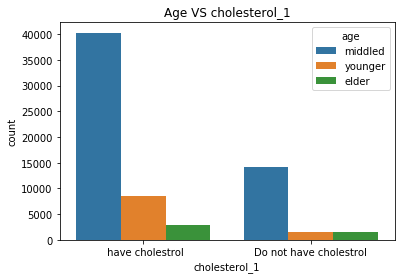

In [6]:
sns.countplot(data= df2, hue ='age' , x = 'cholesterol_1') #make a count plot and  count of observations 
plt.title('Age VS cholesterol_1')

Text(0.5, 1.0, 'Age VS cholesterol_2')

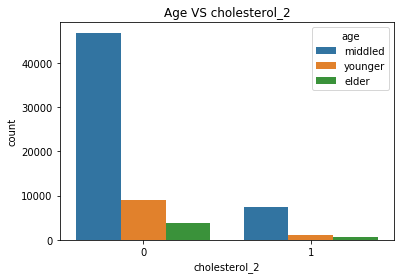

In [8]:
sns.countplot(data= df2, hue ='age' , x = 'cholesterol_2') #make a count plot and  count of observations 
plt.title('Age VS cholesterol_2')

Text(0.5, 1.0, 'Age VS cholesterol_3')

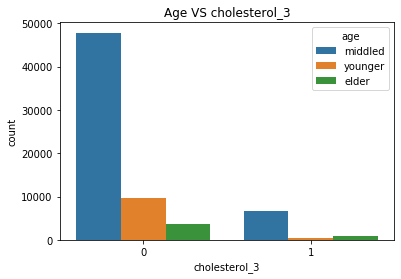

In [9]:
sns.countplot(data= df2, hue ='age' , x = 'cholesterol_3') #make a count plot and  count of observations 
plt.title('Age VS cholesterol_3')

Text(0.5, 1.0, 'Age VS Gender')

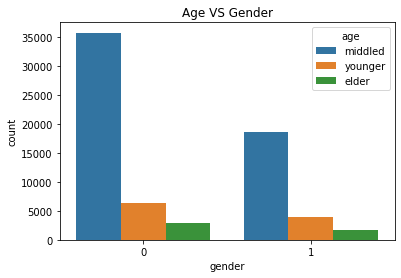

In [10]:
sns.countplot(data= df2, hue ='age' , x = 'gender') #make a count plot and  count of observations 
plt.title('Age VS Gender')

Text(0.5, 1.0, 'Age VS Smoke')

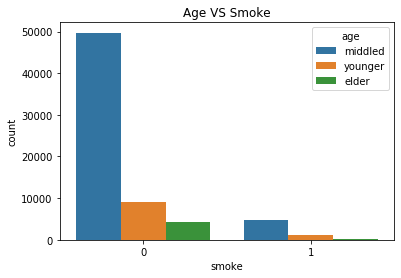

In [11]:
sns.countplot(data= df2, hue ='age' , x = 'smoke') #make a count plot and  count of observations 
plt.title('Age VS Smoke')

Text(0.5, 1.0, 'Age VS Cardio')

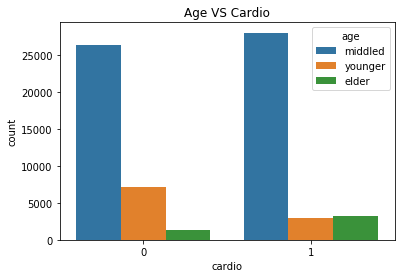

In [12]:
sns.countplot(data= df2, hue ='age' , x = 'cardio') #make a count plot and  count of observations 
plt.title('Age VS Cardio')

In [ ]:
df2 = df.copy() #copy dataframe

#function for  classification
def bmi_function(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif bmi > 18.5 and bmi < 24.9:
        return 'Normal'
    elif bmi > 25.0 and bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
    

df2['bmi'] = df2['bmi'].apply(bmi_function) #call the age function
sns.countplot(data= df2, hue ='age' , x = 'bmi') #make a count plot and  count of observations 
plt.title('age VS BMI')

In [37]:
df = df.dropna() #drop null values
df.isnull().sum()

age              0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
smoke            0
alco             0
active           0
cardio           0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
bmi              0
bp               0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

#split dataset into train and test
cardio_data_labels = list(df)
predictors = df[cardio_data_labels]
target = df['cardio']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 55200 records and Testing features have 13800 records.


In [39]:
X_train.shape #print train value

(55200, 18)

In [40]:
X_test.shape

(13800, 18)

In [41]:
Y_train.shape

(55200,)

In [42]:
Y_test.shape

(13800,)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8) #call the train_model function
# knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test) ## make predictions
# print(y_pred_knn)

Train accuracy: 81.81%
Test accuracy: 76.87%


In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate precision, Recall and F1score
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)
KNN_recall_score = recall_score(Y_test,y_pred_knn)
KNN_Score = f1_score(Y_test,y_pred_knn)
print("recall score = ", KNN_recall_score)
print("f1 score = ", KNN_Score)

Precision:  0.8029332434254889
recall score =  0.7018862363689949
f1 score =  0.749017141059915


In [50]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 76.87 %


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
matrix= confusion_matrix(Y_test, y_pred_knn)

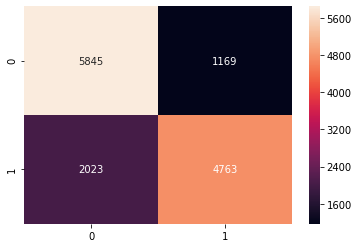

In [60]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [61]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(Y_test,y_pred_knn))

#classification report
acc = f1_score(Y_test,y_pred_knn, average='macro')

              precision    recall  f1-score   support

           0       0.74      0.83      0.79      7014
           1       0.80      0.70      0.75      6786

    accuracy                           0.77     13800
   macro avg       0.77      0.77      0.77     13800
weighted avg       0.77      0.77      0.77     13800

